# Machine learning challenge

- This work is a study cas for an internship for which I've applied. 



### 1. Classify the breast cancer wisconsin dataset.
You can find more information about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). It is a binary classification task where the goal is to train a classifier to detect benign and malignant cell nucleus.

You can use the model and library of your choice but we expect a good accuracy. We expect from you to provide metrics that would be useful to understand how the model perform. We are expecting you to explain and justify your metrics and model choices.

You'll be evaluated on the quality of your code and plots (readability, efficiency), the accuracy of your model and the quality of your explanations.

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.DataFrame(data = dataset['data'],
                    columns = dataset['feature_names'])
data['Diagnosis'] = dataset['target']

print(f'Dataset have {len(data)} rows')
data = data.dropna() #We make sure there aren't missing data
print(f'Working with {len(data)} rows')
data.head()

Dataset have 569 rows
Working with 569 rows


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


- We do not have missing values, as mentioned in the website

## **Understanding and visualizing Data**

In [ ]:
import matplotlib.pyplot as plt

- We check this in case we have a very unbalanced dataset

1    357
0    212
Name: Diagnosis, dtype: int64


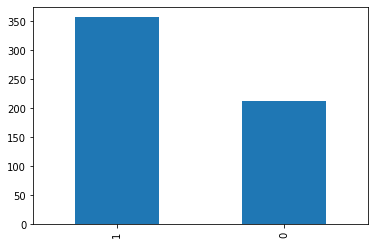

In [ ]:
data['Diagnosis'].value_counts().plot(kind = 'bar')
print(data['Diagnosis'].value_counts())

- Our dataset isn't unbalanced. Thus, We will use accuracy and auc score as metrics.

**Correlation**

- I'm plotting the correlation Matrix

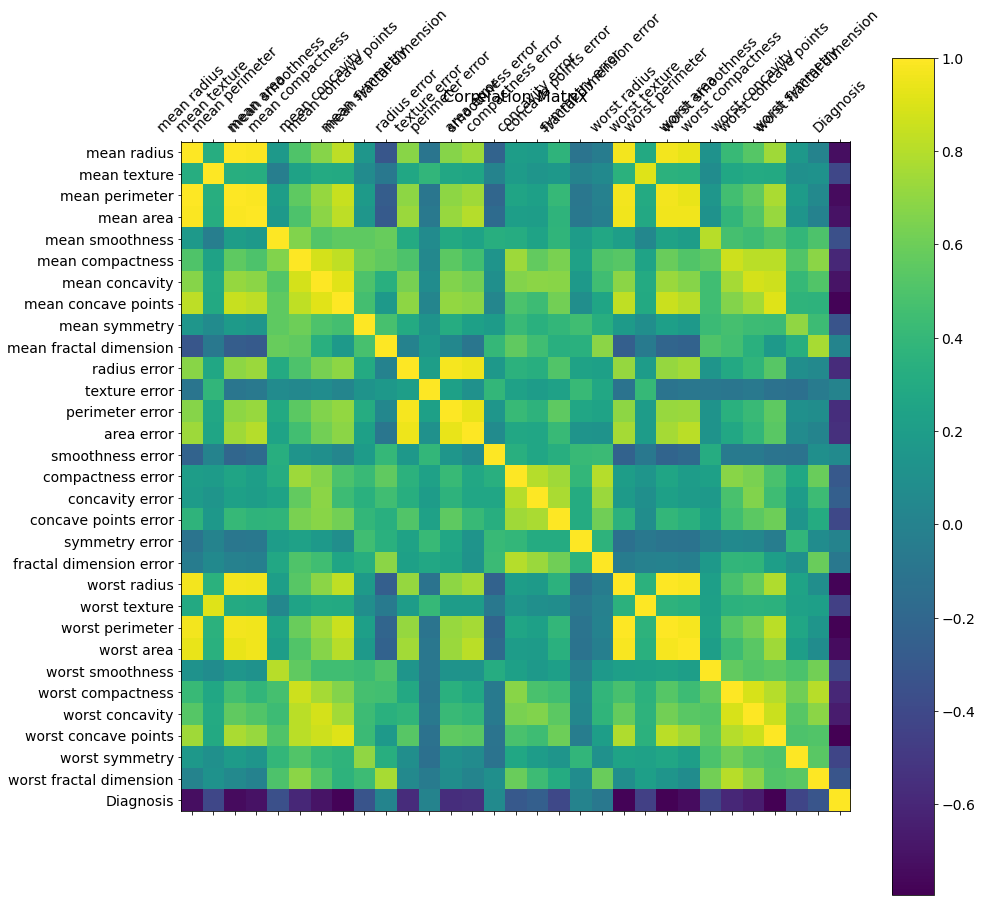

In [ ]:
f = plt.figure(figsize=(15, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

- It seems like there is relationship between some features (Texture and perimeter or  also radius and fractal dimension).
- Considering this, I'll use a method for dimensionality reduction, such as Principal Component Analysis. 

## **Preparing Data for training**

In [ ]:
X = data.iloc[:, :30]
y = data['Diagnosis']

print(X.shape)
X.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Now, we split our data to a train part and a test part for training our algorithm

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

- Now, I'll perform a PCA for dimensional reduction as mentioned before. I'll also scale the features before this,
  since the PCA is sensitive to the variance and the features aren't in the same scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled[:1] #We print one line rescaled, to check

array([[0.63225898, 0.48962656, 0.63651441, 0.47529162, 0.58111402,
        0.51567389, 0.60154784, 0.78619969, 0.76212121, 0.3525695 ,
        0.16610538, 0.18745404, 0.15337134, 0.11557988, 0.09900573,
        0.16566527, 0.10500329, 0.34861217, 0.27857826, 0.11154918,
        0.61792956, 0.52878465, 0.60107575, 0.43079041, 0.55146799,
        0.4052829 , 0.42683706, 0.92268041, 0.78710822, 0.31063886]])

- We scaled the data to the range between 0 and 1 before using PCA
- For PCA, we want the explained variance to be between 95–99%. This is an alternative for choosing the optimal n_components in the PCA.

In [ ]:
pca = PCA(n_components = 0.95)
pca.fit(X_train_scaled)

X_train_reduced = pca.transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

## **Classification Model**

- I will find the best classifier between : Logistic Regression, SVM (SVC implementation) and Random Forest. 
- I'm defying a dictionnary per classifier and per metric (Accuracy and AUC_Score), plus a list of different values for important parameters for each classifier. 
The idea is to find the best classifier with the optimal parameters, the ones who give the best accuracy and the best auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
dico_log_reg_accuracy = {}
dico_log_reg_auc_score = {}

list_C_log_Reg = np.linspace(0.1, 2, 20, endpoint = True)

dico_SVC_accuracy = {}
dico_SVC_auc_score = {}

list_gamma = np.linspace(0.05, 0.1, 5, endpoint = True)
list_C_SVC = np.linspace(0.5, 1.5, 10, endpoint = True)

dico_random_forest_accuracy = {}
dico_random_forest_auc_score = {}

list_max_depth_rf = np.linspace(10, 200, 20, endpoint = True)

In [ ]:
for C in tqdm(list_C_log_Reg) : 
    clf = LogisticRegression(C = C, random_state=0)
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    dico_log_reg_accuracy[C] = accuracy_score(y_test, y_pred)
    dico_log_reg_auc_score[C] = roc_auc_score(y_test, y_pred)

for C in tqdm(list_C_SVC):
    for gamma in list_gamma:
        SVCmodel = SVC(C = C, gamma = gamma)
        SVCmodel.fit(X_train_reduced, y_train)
        y_pred = SVCmodel.predict(X_test_reduced)
        dico_SVC_accuracy[C, gamma] = accuracy_score(y_test, y_pred)
        dico_SVC_auc_score[C, gamma] = roc_auc_score(y_test, y_pred)

for max_depth in tqdm(list_max_depth_rf):
    random_forest = RandomForestClassifier(max_depth = max_depth, random_state=0)
    random_forest.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    dico_random_forest_accuracy[max_depth] = accuracy_score(y_test, y_pred)
    dico_random_forest_auc_score[max_depth] = roc_auc_score(y_test, y_pred)   

100%|██████████| 20/20 [00:03<00:00,  5.52it/s]


In [ ]:
print(f'Best accuracy for logistic Regression : {max(dico_log_reg_accuracy.values())}')
print(f'Best accuracy for SVC : {max(dico_SVC_accuracy.values())}')
print(f'Best accuracy for Random Forest : {max(dico_random_forest_accuracy.values())} \n')

print(f'Best AUC for Logistic Regression : {round(max(dico_log_reg_auc_score.values()), 2)}')
print(f'Best AUC for SVC : {round(max(dico_SVC_auc_score.values()), 2)}')
print(f'Best AUC for Random Forest {round(max(dico_random_forest_auc_score.values()), 2)}')

Best accuracy for logistic Regression : 0.956140350877193
Best accuracy for SVC : 0.9473684210526315
Best accuracy for Random Forest : 0.9385964912280702 

Best AUC for Logistic Regression : 0.95
Best AUC for SVC : 0.95
Best AUC for Random Forest 0.94


- We notice that the Logistic Regression allows the best accuracy (0,956) and an AUC of 0.95
- I retrieve one key containing the parameters allowing this score

In [ ]:
[key for key in dico_log_reg_accuracy.keys() if dico_log_reg_accuracy[key] == max(dico_log_reg_accuracy.values())][0]

0.7

### **We evaluate our model thanks to a cross-validation** 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
Classifier = LogisticRegression(C = 0.7)

mean_accuracy = cross_val_score(Classifier, X_train_reduced, y_train, cv = 10, scoring = 'accuracy').mean()
mean_auc_score = cross_val_score(Classifier, X_train_reduced, y_train, cv = 10, scoring = 'roc_auc').mean()
print(f' Accuracy = {round(mean_accuracy, 4)}')
print(f' AUC_Score = {round(mean_auc_score, 4)}')

 Accuracy = 0.9647
 AUC_Score = 0.9959


- The mean of 10 folds cross validation accuracy is : 96.5% with an AUC of 0.995

## More Metrics 

In [ ]:
from sklearn.metrics import classification_report

Classifier.fit(X_train_reduced, y_train)
y_pred = Classifier.predict(X_test_reduced)

print(classification_report(y_test, y_pred, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.94      0.92      0.93        36
           B       0.96      0.97      0.97        78

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



- The classifier shows good results in terms of precision and recall, with numbers above 94%.

## Going Further

- It would be very interesting to compare these results with XGBoostClassifier to compare Results 